In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
PATH = './FashionMNIST'

In [3]:
ds = datasets.FashionMNIST(PATH, download=True)

In [4]:
data = ds.train_data.view(-1).float() / 255
m = data.mean()
s = data.std()
m, s 

(tensor(0.2860), tensor(0.3530))

In [5]:
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((m,), (s,))
])

In [6]:
train_ds = datasets.FashionMNIST(PATH, transform=tfms, download=True, train=True)
test_ds = datasets.FashionMNIST(PATH, transform=tfms, download=True, train=False)

In [7]:
train_loader = DataLoader(train_ds, batch_size=30)
test_loader = DataLoader(test_ds, batch_size=30)

In [8]:
class Net(nn.Module):
    def __init__(self, lr=1e-4, l2=0.):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)
        self.optim = optim.Adam(self.parameters(), lr=lr, weight_decay=l2)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x
    
    def loss(self, output, target, **kwargs):
        self._loss = F.nll_loss(output, target, **kwargs)
        return self._loss

In [9]:
def train(epoch, model):
    train_size = len(train_loader.sampler)
    avg_lambda = lambda l: 'Loss: {:.4f}'.format(l)
    acc_lambda = lambda c, p: 'Accuracy: {}/{} ({:.0f}%)'.format(c, train_size, p)
    line = lambda l, c, p: ' ' + avg_lambda(l) + '\t' + acc_lambda(c, p)
    correct = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        model.optim.zero_grad()
        data = data.cuda()
        target = target.cuda()
        output = model(data)
        loss = model.loss(output, target)
        loss.backward()
        model.optim.step()
        _, pred = torch.max(output.data, 1)
        correct += (pred == target).sum().item()
    
    train_loss = model._loss.item()
    correct_pct = correct / train_size
    report = f'Train epoch {epoch}: {line(train_loss, correct, 100.0 * correct_pct)}'
    print(report)
    
    return train_loss, correct_pct

In [10]:
def test(model, loader):
    test_size = len(loader.sampler)
    avg_lambda = lambda l: 'Loss: {:.4f}'.format(l)
    acc_lambda = lambda c, p: 'Accuracy: {}/{} ({:.0f}%)'.format(c, test_size, p)
    line = lambda l, c, p: ' ' + avg_lambda(l) + '\t' + acc_lambda(c, p)

    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            data = data.cuda()
            target = target.cuda()
            output = model(data)
            test_loss += model.loss(output, target, size_average=False).item() # sum up batch loss
            _, pred = torch.max(output.data, 1)
            correct += (pred == target).sum().item()
    
    test_loss /= test_size
    correct_pct = correct / test_size
    report = f'Test set: {line(test_loss, correct, 100.0 * correct_pct)}\n'
    print(report)
    
    return test_loss, correct_pct

In [11]:
def plot():
    plt.figure(figsize=(12,6))
    plt.plot(tst_losses, color='green', label="test")
    plt.plot(trn_losses, color='blue', label="train")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    plt.figure(figsize=(12,6))
    plt.plot(tst_accuracy, color='green', label="test")
    plt.plot(trn_accuracy, color='blue', label="train")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

Train epoch 1:  Loss: 0.4952	Accuracy: 47356/60000 (79%)
Test set:  Loss: 0.5033	Accuracy: 8217/10000 (82%)

Train epoch 2:  Loss: 0.3924	Accuracy: 50578/60000 (84%)
Test set:  Loss: 0.4562	Accuracy: 8364/10000 (84%)

Train epoch 3:  Loss: 0.3455	Accuracy: 51310/60000 (86%)
Test set:  Loss: 0.4328	Accuracy: 8448/10000 (84%)

Train epoch 4:  Loss: 0.3102	Accuracy: 51775/60000 (86%)
Test set:  Loss: 0.4175	Accuracy: 8505/10000 (85%)

Train epoch 5:  Loss: 0.2900	Accuracy: 52097/60000 (87%)
Test set:  Loss: 0.4065	Accuracy: 8541/10000 (85%)

Train epoch 6:  Loss: 0.2824	Accuracy: 52353/60000 (87%)
Test set:  Loss: 0.3974	Accuracy: 8590/10000 (86%)

Train epoch 7:  Loss: 0.2698	Accuracy: 52559/60000 (88%)
Test set:  Loss: 0.3906	Accuracy: 8608/10000 (86%)

Train epoch 8:  Loss: 0.2607	Accuracy: 52727/60000 (88%)
Test set:  Loss: 0.3847	Accuracy: 8636/10000 (86%)

Train epoch 9:  Loss: 0.2503	Accuracy: 52907/60000 (88%)
Test set:  Loss: 0.3792	Accuracy: 8658/10000 (87%)

Train epoch 10:  Lo

Train epoch 76:  Loss: 0.1249	Accuracy: 56647/60000 (94%)
Test set:  Loss: 0.3689	Accuracy: 8801/10000 (88%)

Train epoch 77:  Loss: 0.1234	Accuracy: 56683/60000 (94%)
Test set:  Loss: 0.3705	Accuracy: 8805/10000 (88%)

Train epoch 78:  Loss: 0.1225	Accuracy: 56693/60000 (94%)
Test set:  Loss: 0.3711	Accuracy: 8808/10000 (88%)

Train epoch 79:  Loss: 0.1225	Accuracy: 56724/60000 (95%)
Test set:  Loss: 0.3720	Accuracy: 8806/10000 (88%)

Train epoch 80:  Loss: 0.1175	Accuracy: 56747/60000 (95%)
Test set:  Loss: 0.3733	Accuracy: 8799/10000 (88%)

Train epoch 81:  Loss: 0.1192	Accuracy: 56779/60000 (95%)
Test set:  Loss: 0.3747	Accuracy: 8794/10000 (88%)

Train epoch 82:  Loss: 0.1195	Accuracy: 56805/60000 (95%)
Test set:  Loss: 0.3757	Accuracy: 8796/10000 (88%)

Train epoch 83:  Loss: 0.1192	Accuracy: 56840/60000 (95%)
Test set:  Loss: 0.3773	Accuracy: 8798/10000 (88%)

Train epoch 84:  Loss: 0.1188	Accuracy: 56862/60000 (95%)
Test set:  Loss: 0.3785	Accuracy: 8795/10000 (88%)

Train epoc

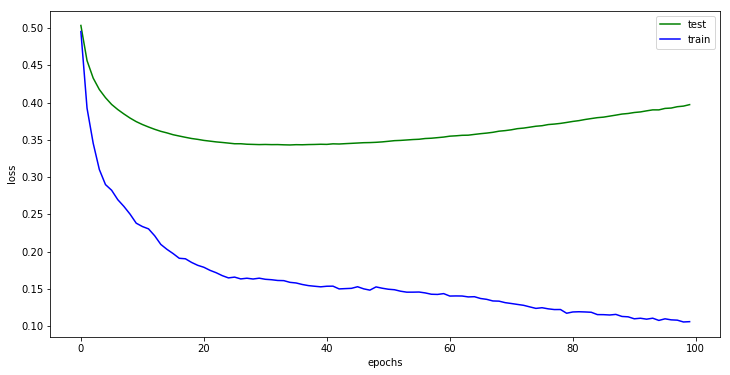

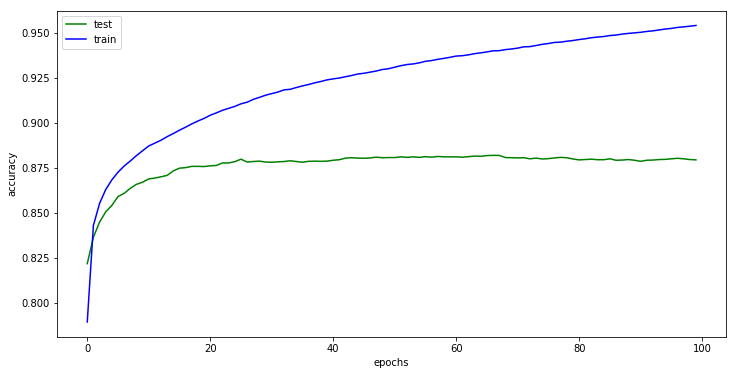

Train epoch 101:  Loss: 0.1046	Accuracy: 57259/60000 (95%)
Test set:  Loss: 0.3979	Accuracy: 8804/10000 (88%)

Train epoch 102:  Loss: 0.1028	Accuracy: 57285/60000 (95%)
Test set:  Loss: 0.3991	Accuracy: 8802/10000 (88%)

Train epoch 103:  Loss: 0.1049	Accuracy: 57296/60000 (95%)
Test set:  Loss: 0.4008	Accuracy: 8805/10000 (88%)

Train epoch 104:  Loss: 0.1043	Accuracy: 57313/60000 (96%)
Test set:  Loss: 0.4015	Accuracy: 8806/10000 (88%)

Train epoch 105:  Loss: 0.1024	Accuracy: 57330/60000 (96%)
Test set:  Loss: 0.4029	Accuracy: 8799/10000 (88%)

Train epoch 106:  Loss: 0.1008	Accuracy: 57352/60000 (96%)
Test set:  Loss: 0.4040	Accuracy: 8800/10000 (88%)

Train epoch 107:  Loss: 0.0996	Accuracy: 57376/60000 (96%)
Test set:  Loss: 0.4059	Accuracy: 8800/10000 (88%)

Train epoch 108:  Loss: 0.1015	Accuracy: 57395/60000 (96%)
Test set:  Loss: 0.4075	Accuracy: 8794/10000 (88%)

Train epoch 109:  Loss: 0.0984	Accuracy: 57401/60000 (96%)
Test set:  Loss: 0.4085	Accuracy: 8793/10000 (88%)

T

Train epoch 175:  Loss: 0.0571	Accuracy: 58415/60000 (97%)
Test set:  Loss: 0.5145	Accuracy: 8760/10000 (88%)

Train epoch 176:  Loss: 0.0567	Accuracy: 58423/60000 (97%)
Test set:  Loss: 0.5168	Accuracy: 8765/10000 (88%)

Train epoch 177:  Loss: 0.0535	Accuracy: 58441/60000 (97%)
Test set:  Loss: 0.5180	Accuracy: 8765/10000 (88%)

Train epoch 178:  Loss: 0.0550	Accuracy: 58436/60000 (97%)
Test set:  Loss: 0.5197	Accuracy: 8768/10000 (88%)

Train epoch 179:  Loss: 0.0542	Accuracy: 58457/60000 (97%)
Test set:  Loss: 0.5214	Accuracy: 8772/10000 (88%)

Train epoch 180:  Loss: 0.0557	Accuracy: 58480/60000 (97%)
Test set:  Loss: 0.5227	Accuracy: 8770/10000 (88%)

Train epoch 181:  Loss: 0.0525	Accuracy: 58492/60000 (97%)
Test set:  Loss: 0.5251	Accuracy: 8763/10000 (88%)

Train epoch 182:  Loss: 0.0515	Accuracy: 58494/60000 (97%)
Test set:  Loss: 0.5272	Accuracy: 8758/10000 (88%)

Train epoch 183:  Loss: 0.0555	Accuracy: 58503/60000 (98%)
Test set:  Loss: 0.5284	Accuracy: 8763/10000 (88%)

T

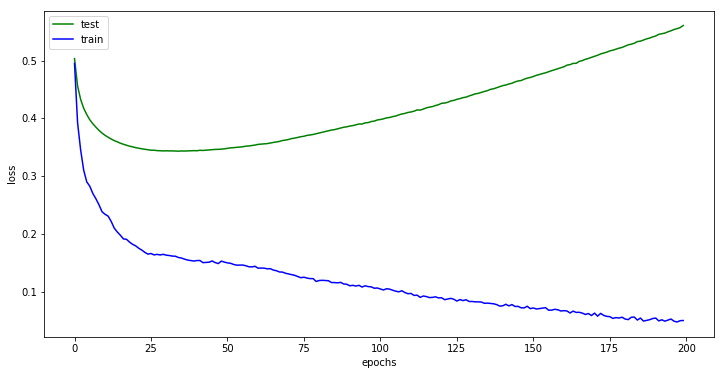

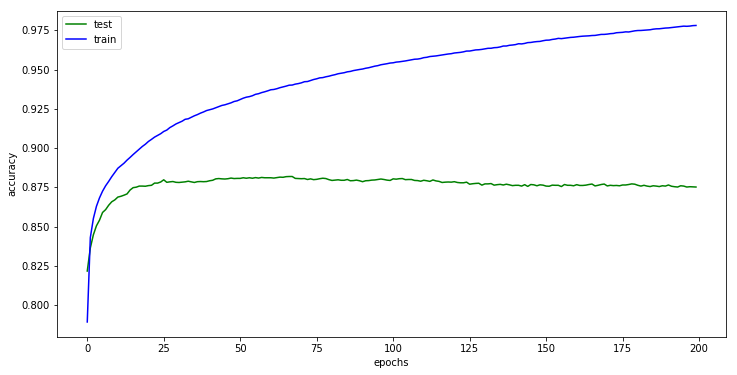

Train epoch 201:  Loss: 0.0503	Accuracy: 58701/60000 (98%)
Test set:  Loss: 0.5610	Accuracy: 8753/10000 (88%)

Train epoch 202:  Loss: 0.0493	Accuracy: 58707/60000 (98%)
Test set:  Loss: 0.5639	Accuracy: 8750/10000 (88%)

Train epoch 203:  Loss: 0.0495	Accuracy: 58715/60000 (98%)
Test set:  Loss: 0.5656	Accuracy: 8752/10000 (88%)

Train epoch 204:  Loss: 0.0470	Accuracy: 58725/60000 (98%)
Test set:  Loss: 0.5668	Accuracy: 8751/10000 (88%)

Train epoch 205:  Loss: 0.0496	Accuracy: 58731/60000 (98%)
Test set:  Loss: 0.5699	Accuracy: 8758/10000 (88%)

Train epoch 206:  Loss: 0.0462	Accuracy: 58753/60000 (98%)
Test set:  Loss: 0.5718	Accuracy: 8752/10000 (88%)

Train epoch 207:  Loss: 0.0473	Accuracy: 58755/60000 (98%)
Test set:  Loss: 0.5740	Accuracy: 8748/10000 (87%)

Train epoch 208:  Loss: 0.0470	Accuracy: 58771/60000 (98%)
Test set:  Loss: 0.5744	Accuracy: 8750/10000 (88%)

Train epoch 209:  Loss: 0.0447	Accuracy: 58771/60000 (98%)
Test set:  Loss: 0.5768	Accuracy: 8748/10000 (87%)

T

Train epoch 275:  Loss: 0.0240	Accuracy: 59275/60000 (99%)
Test set:  Loss: 0.7099	Accuracy: 8711/10000 (87%)

Train epoch 276:  Loss: 0.0249	Accuracy: 59271/60000 (99%)
Test set:  Loss: 0.7124	Accuracy: 8707/10000 (87%)

Train epoch 277:  Loss: 0.0233	Accuracy: 59291/60000 (99%)
Test set:  Loss: 0.7160	Accuracy: 8701/10000 (87%)

Train epoch 278:  Loss: 0.0240	Accuracy: 59279/60000 (99%)
Test set:  Loss: 0.7155	Accuracy: 8710/10000 (87%)

Train epoch 279:  Loss: 0.0247	Accuracy: 59295/60000 (99%)
Test set:  Loss: 0.7181	Accuracy: 8705/10000 (87%)

Train epoch 280:  Loss: 0.0243	Accuracy: 59310/60000 (99%)
Test set:  Loss: 0.7214	Accuracy: 8699/10000 (87%)

Train epoch 281:  Loss: 0.0236	Accuracy: 59301/60000 (99%)
Test set:  Loss: 0.7239	Accuracy: 8703/10000 (87%)

Train epoch 282:  Loss: 0.0223	Accuracy: 59308/60000 (99%)
Test set:  Loss: 0.7233	Accuracy: 8705/10000 (87%)

Train epoch 283:  Loss: 0.0223	Accuracy: 59312/60000 (99%)
Test set:  Loss: 0.7266	Accuracy: 8709/10000 (87%)

T

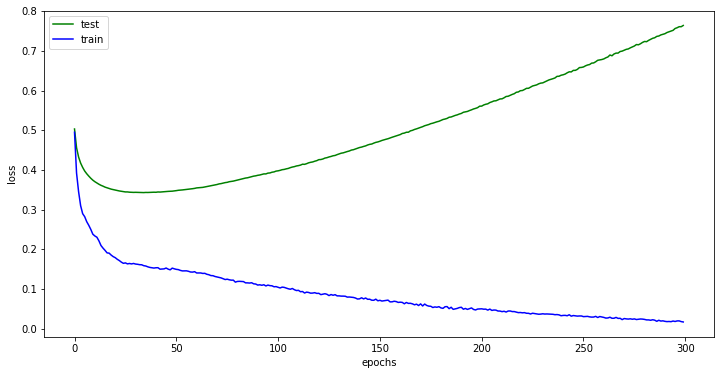

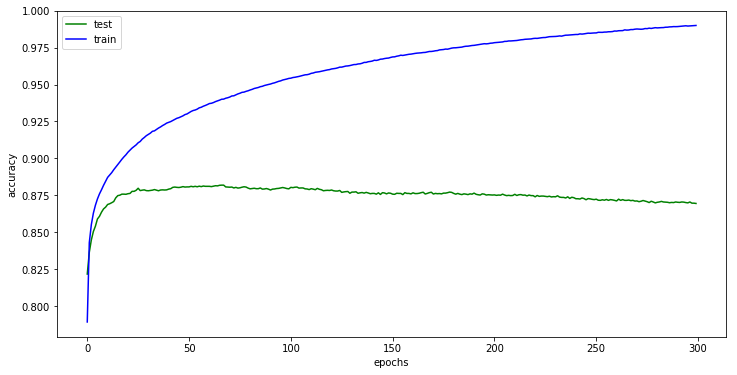

In [12]:
trn_losses = []
tst_losses = []
tst_accuracy = []
trn_accuracy = []
with torch.cuda.device(6) as d:
    model = Net().cuda()
    for epoch in range(1, 301):
        model.train()
        l, a = train(epoch, model)
        trn_losses.append(l)
        trn_accuracy.append(a)
        model.eval()
        l, a = test(model, test_loader)
        tst_losses.append(l)
        tst_accuracy.append(a)
        if epoch % 100 == 0:
            plot()        

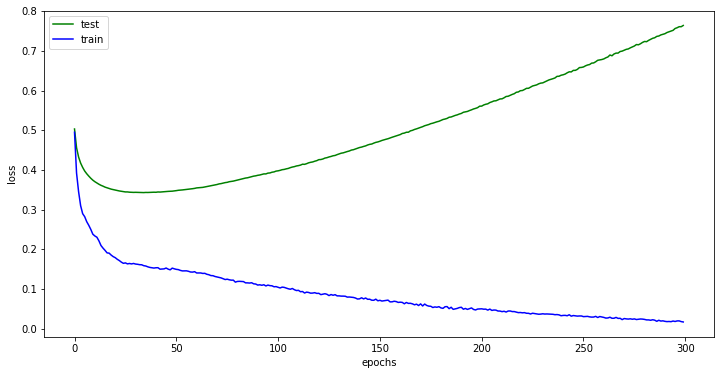

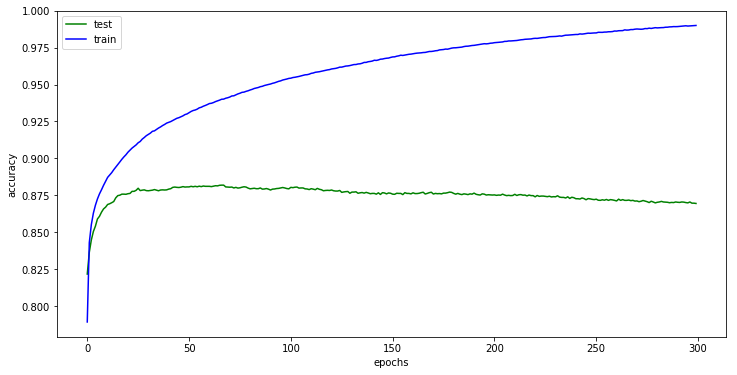

In [13]:
plot()

In [14]:
with torch.cuda.device(6) as d:
    for epoch in range(301, 401):
        model.train()
        l, a = train(epoch, model)
        trn_losses.append(l)
        trn_accuracy.append(a)
        model.eval()
        l, a = test(model, test_loader)
        tst_losses.append(l)
        tst_accuracy.append(a)

Train epoch 301:  Loss: 0.0182	Accuracy: 59411/60000 (99%)
Test set:  Loss: 0.7672	Accuracy: 8701/10000 (87%)

Train epoch 302:  Loss: 0.0182	Accuracy: 59410/60000 (99%)
Test set:  Loss: 0.7694	Accuracy: 8693/10000 (87%)

Train epoch 303:  Loss: 0.0173	Accuracy: 59412/60000 (99%)
Test set:  Loss: 0.7713	Accuracy: 8698/10000 (87%)

Train epoch 304:  Loss: 0.0179	Accuracy: 59429/60000 (99%)
Test set:  Loss: 0.7727	Accuracy: 8696/10000 (87%)

Train epoch 305:  Loss: 0.0185	Accuracy: 59430/60000 (99%)
Test set:  Loss: 0.7747	Accuracy: 8700/10000 (87%)

Train epoch 306:  Loss: 0.0170	Accuracy: 59422/60000 (99%)
Test set:  Loss: 0.7782	Accuracy: 8691/10000 (87%)

Train epoch 307:  Loss: 0.0168	Accuracy: 59438/60000 (99%)
Test set:  Loss: 0.7801	Accuracy: 8693/10000 (87%)

Train epoch 308:  Loss: 0.0171	Accuracy: 59432/60000 (99%)
Test set:  Loss: 0.7810	Accuracy: 8688/10000 (87%)

Train epoch 309:  Loss: 0.0184	Accuracy: 59443/60000 (99%)
Test set:  Loss: 0.7846	Accuracy: 8690/10000 (87%)

T

Train epoch 375:  Loss: 0.0105	Accuracy: 59723/60000 (100%)
Test set:  Loss: 0.9436	Accuracy: 8660/10000 (87%)

Train epoch 376:  Loss: 0.0123	Accuracy: 59718/60000 (100%)
Test set:  Loss: 0.9483	Accuracy: 8659/10000 (87%)

Train epoch 377:  Loss: 0.0109	Accuracy: 59725/60000 (100%)
Test set:  Loss: 0.9491	Accuracy: 8654/10000 (87%)

Train epoch 378:  Loss: 0.0117	Accuracy: 59722/60000 (100%)
Test set:  Loss: 0.9553	Accuracy: 8663/10000 (87%)

Train epoch 379:  Loss: 0.0121	Accuracy: 59723/60000 (100%)
Test set:  Loss: 0.9580	Accuracy: 8657/10000 (87%)

Train epoch 380:  Loss: 0.0109	Accuracy: 59728/60000 (100%)
Test set:  Loss: 0.9579	Accuracy: 8660/10000 (87%)

Train epoch 381:  Loss: 0.0104	Accuracy: 59746/60000 (100%)
Test set:  Loss: 0.9616	Accuracy: 8665/10000 (87%)

Train epoch 382:  Loss: 0.0119	Accuracy: 59744/60000 (100%)
Test set:  Loss: 0.9636	Accuracy: 8654/10000 (87%)

Train epoch 383:  Loss: 0.0103	Accuracy: 59741/60000 (100%)
Test set:  Loss: 0.9677	Accuracy: 8655/10000

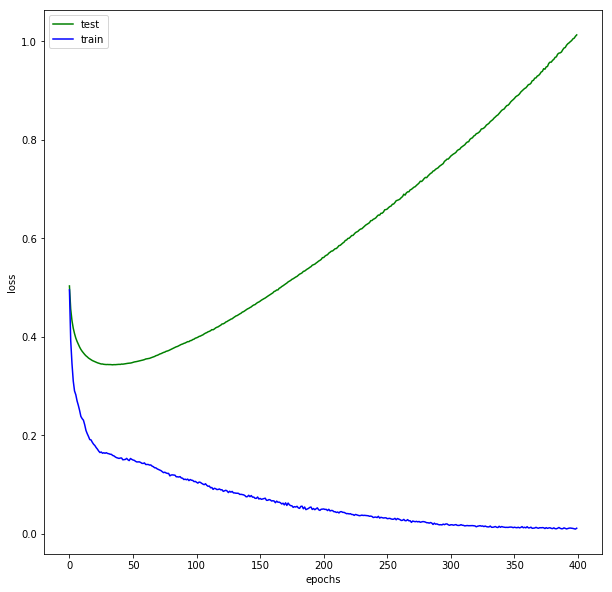

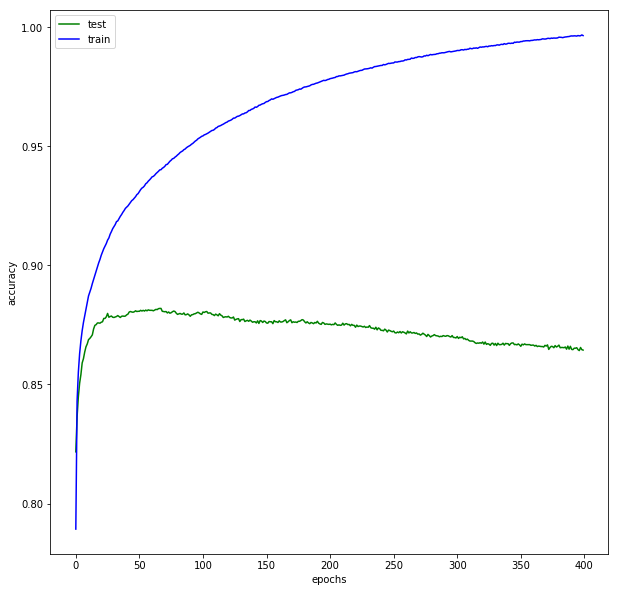

In [20]:
plt.figure(figsize=(10,10))
plt.plot(tst_losses, color='green', label="test")
plt.plot(trn_losses, color='blue', label="train")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.plot(tst_accuracy, color='green', label="test")
plt.plot(trn_accuracy, color='blue', label="train")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()